# ML Project

In [1]:
# Multiple Linear Regression

# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [500]:
# Importing the dataset
dataset = pd.read_csv('data/train.csv')
dataset_test=pd.read_csv('data/test.csv')

# Missing data analysis and visualization

In [184]:
# function to convert numerical type to categorical data
# numerical columns are actually categorical and we need to convert it

def categorized(data):
    
    data['YrSold'] = data['YrSold'].astype('category')
    data['MoSold'] = data['MoSold'].astype('category')
    data['OverallQual'] = data['OverallQual'].astype('category')
    data['MSSubClass'] = data['MSSubClass'].astype('category')
    data['OverallCond'] = data['OverallCond'].astype('category')
    
    return data

In [505]:
# Standardized way to clean our datasets to address:
    # 1. Missing values
    # 2. Outliers
    # 3. Data that needs to be transformed in some way
    
# Code written by Akshay.

def cleaned(data):
    
    cleaned_data=data.copy()
    if 'SalePrice' in data.columns:
        cleaned_data.drop(cleaned_data[(cleaned_data['GrLivArea']>4000) & (cleaned_data['SalePrice']<300000)].index)
    
    #numerical missing columns
    cleaned_data['LotFrontage'] = cleaned_data.groupby('Neighborhood')['LotFrontage'].transform(
        lambda x: x.fillna(x.median()))
    #data['GarageYrBlt'].fillna(data['YearBuilt'], inplace=True)

    #categorical missing columns where missing is a category
    for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'FireplaceQu','Fence','Alley','MiscFeature',
                'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','PoolQC'):
        cleaned_data[col]=cleaned_data[col].fillna('None')
    
    #categorical missing columns by mode of the missings columns
    cleaned_data['Electrical'] = cleaned_data['Electrical'].fillna(cleaned_data['Electrical'].mode()[0])
    cleaned_data['KitchenQual'] = cleaned_data['KitchenQual'].fillna(cleaned_data['KitchenQual'].mode()[0])
    cleaned_data['Exterior1st'] = cleaned_data['Exterior1st'].fillna(cleaned_data['Exterior1st'].mode()[0])
    cleaned_data['Exterior2nd'] = cleaned_data['Exterior2nd'].fillna(cleaned_data['Exterior2nd'].mode()[0])
    cleaned_data['SaleType'] = cleaned_data['SaleType'].fillna(cleaned_data['SaleType'].mode()[0])
    cleaned_data['Functional'] = cleaned_data['Functional'].fillna(cleaned_data['Functional'].mode()[0])
    #data["Functional"] = data["Functional"].fillna("Typ")
    #cleaned_data['MasVnrType']=data['MasVnrType'].fillna(data['MasVnrType'].mode()[0])
    #cleaned_data['MSZoning'] = data['MSZoning'].fillna(data['MSZoning'].mode()[0])
    
    #Impute 0s
    for col in ('GarageYrBlt', 'GarageArea', 'GarageCars','BsmtFullBath','BsmtHalfBath','Utilities','TotalBsmtSF',
               'BsmtUnfSF','BsmtFinSF1','BsmtFinSF2','MasVnrArea'):
        cleaned_data[col]=cleaned_data[col].fillna(0)

    #data.drop(['Utilities'], axis=1, inplace=True)
    # data["TotalSF"] = data["TotalBsmtSF"] + data["1stFlrSF"] + data["2ndFlrSF"]
    # data.drop(["TotalBsmtSF","1stFlrSF","2ndFlrSF"], axis=1, inplace=True)
    
    return pd.get_dummies((cleaned_data))


In [513]:
dataset = pd.read_csv('data/train.csv')
dataset_test=pd.read_csv('data/test.csv')
(cleaned(dataset_test)).to_csv("i")

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_None,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_0,Utilities_AllPub,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_Fin,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,Gar

In [449]:
# Summarize the missingness in the dataset for each attribute (column) by total and percentage
def missingness_summary(dataset):
    import pandas as pd
    total = dataset.isnull().sum().sort_values(ascending=False)
    percent = (dataset.isnull().sum()/dataset.isnull().count()).sort_values(ascending=False)
    datatype=dataset.dtypes
    missing_data = pd.concat([total, percent,datatype], axis=1, keys=['Total', 'Percent','DataType'])
    return(missing_data.sort_values('Total',ascending=False).head(21))

# Return rows that are missing data on any column, for inspection
def missing_data(df):
    missing_columns=missingness_summary(df)[missingness_summary(df)['Total']>0].index
    df = df[missing_columns]
    return(df[df.isnull().any(axis=1)])

df=cleaned(dataset_test)
pd.set_option('display.max_columns', 1000)#pd.merge(df,missing_data(df))
missing_data(df)

""


In [230]:
# missing data by features visualization 
def visualize_missingness(dataset):
    import matplotlib.pyplot as plt
    import seaborn as sns
    import matplotlib.ticker as plticker
    f, ax = plt.subplots(figsize=(15, 12))
    plt.xticks(rotation='90')
    ax.yaxis.set_major_locator(plticker.MultipleLocator(base=1.0))# Set ticks at regular intervals
    sns.barplot(x=missingness_summary(dataset).index, y='Total',data=missingness_summary(dataset),color='b',palette='Set3')
    plt.xlabel('Predictors', fontsize=15)
    plt.ylabel('Number of missing values', fontsize=15)
    plt.title('number of missing data by predictors', fontsize=15)
        
#visualize_missingness(cleaned(dataset))
#visualize_missingness(missing_data(cleaned(dataset_test)))

""


In [418]:
#dymmyfy categorical variables
X1=
# separating features and target
Y1=np.log(X1['SalePrice'])
X1.drop(['Id','SalePrice'],axis=1,inplace=True)

X2=pd.get_dummies(cleaned(dataset_test))
extra_columns= [col for col in X2.columns if not (col in X1.columns)]
X2.drop(extra_columns,axis=1, inplace=True)
X2=X2.merge(X1, how='left').fillna(0)

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

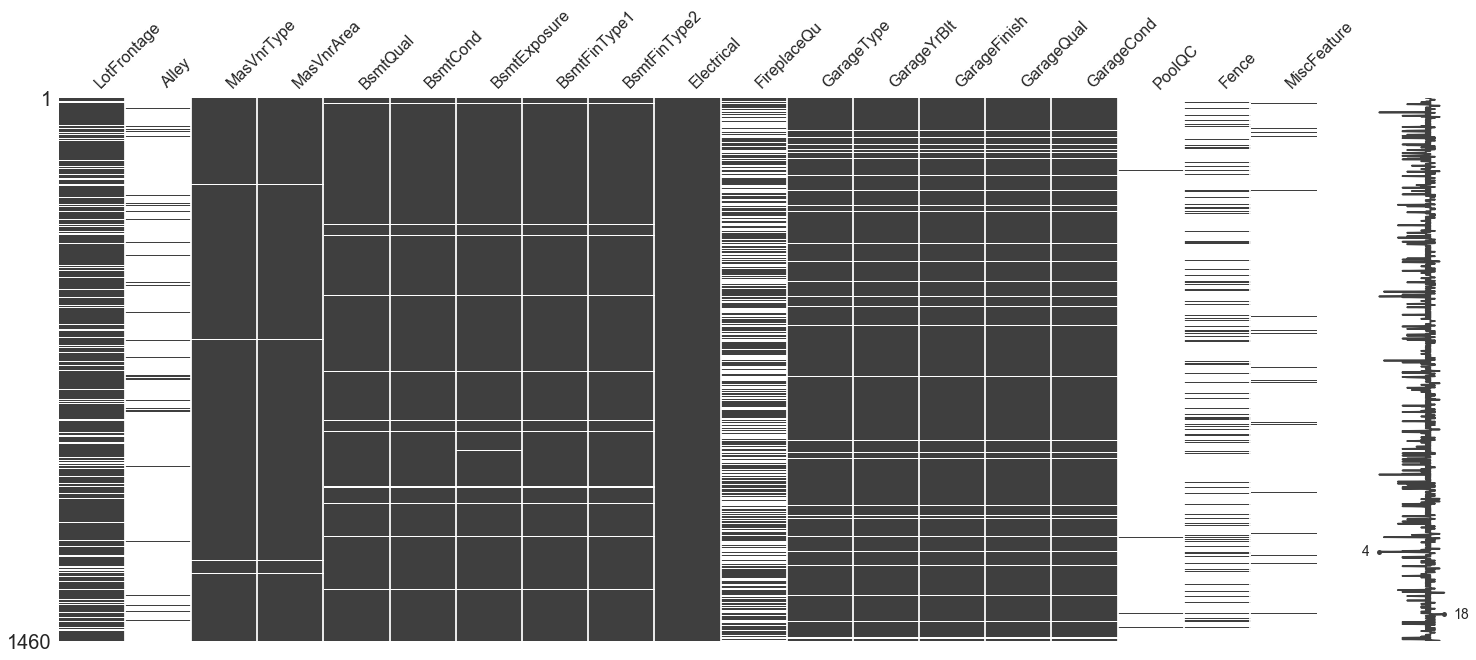

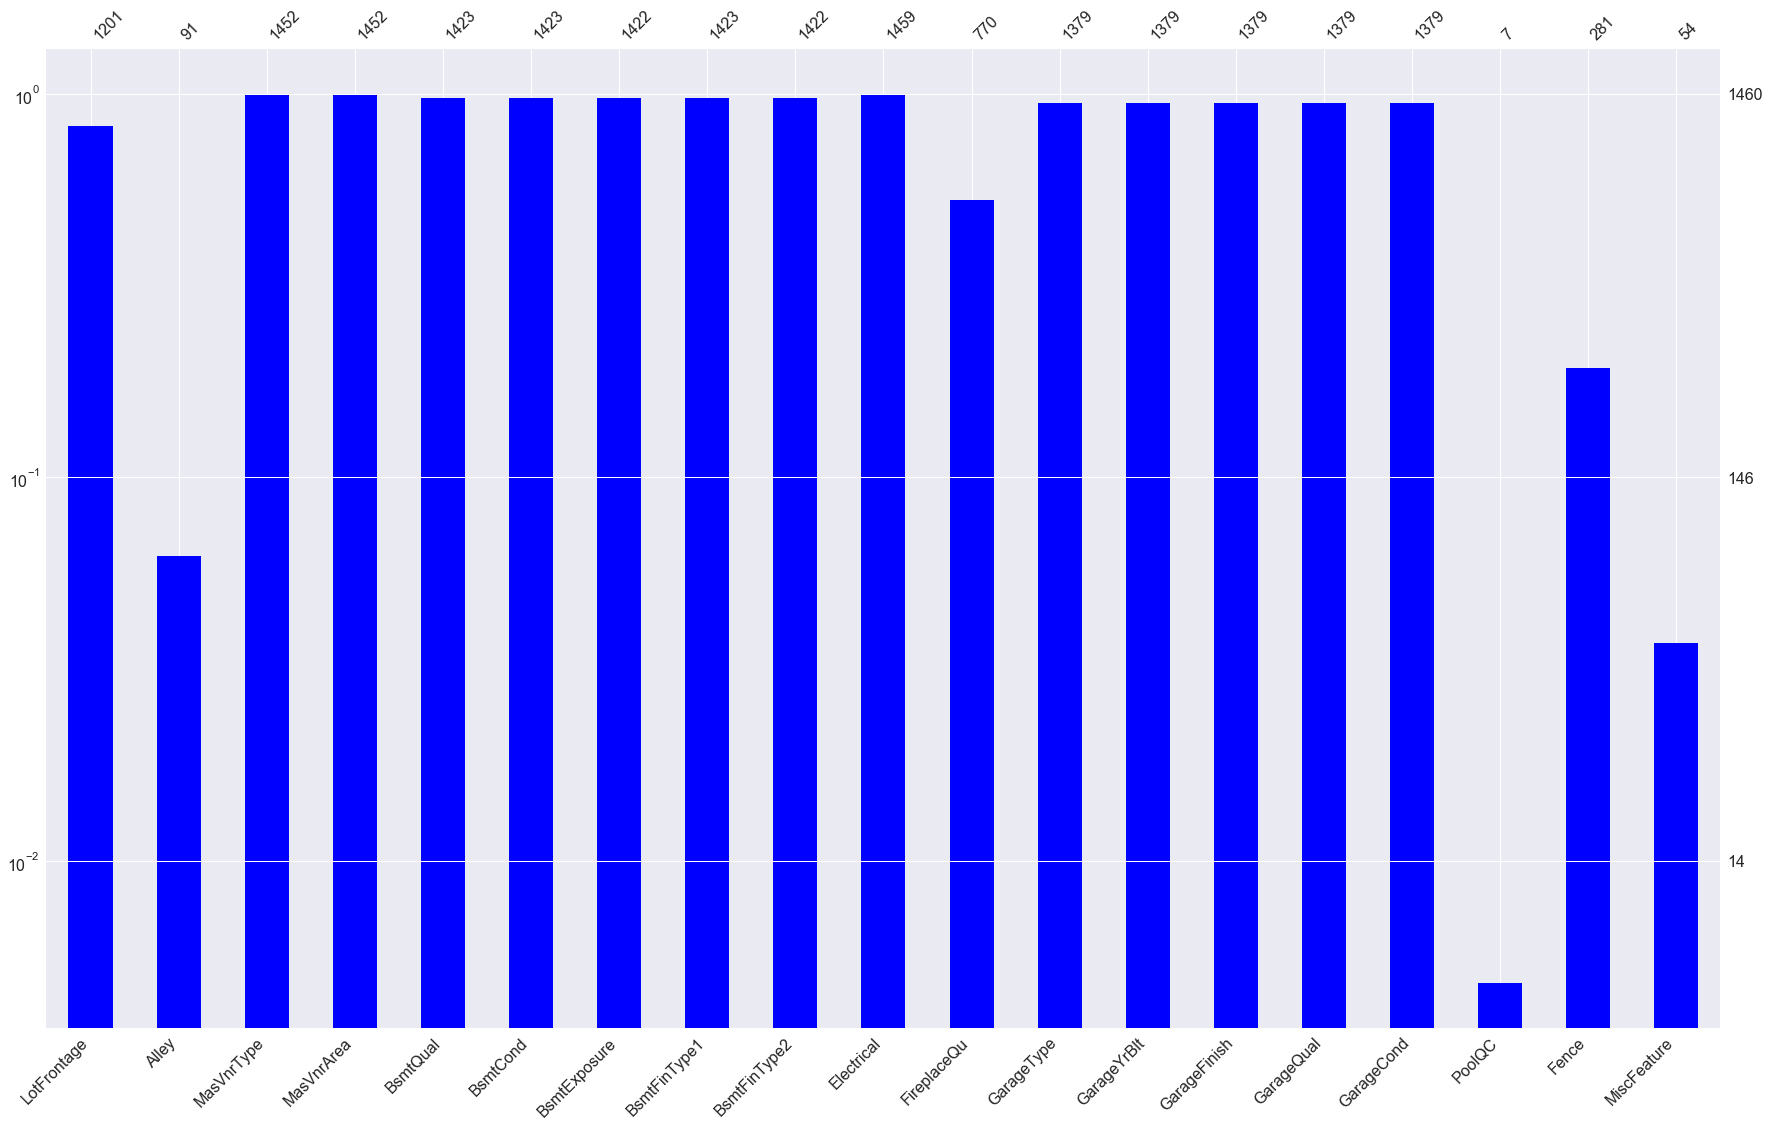

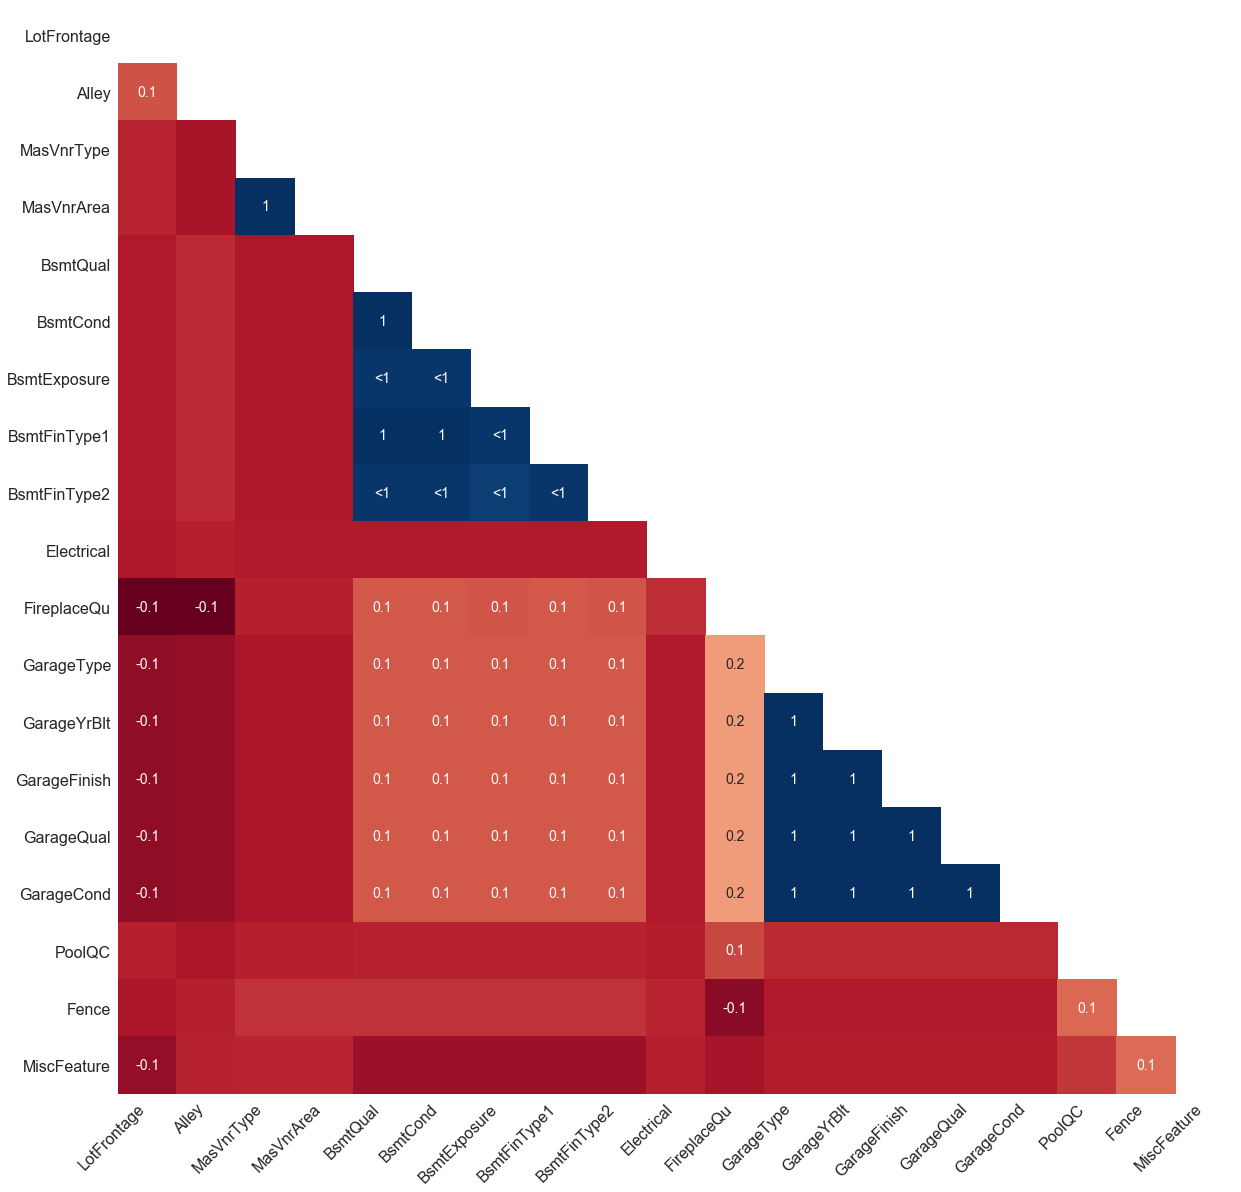

In [168]:
# missing data analysis packages
import missingno as msno
%matplotlib inline

#train_df = pd.read_csv('train_2016_v2.csv', parse_dates=["transactiondate"])
#properties_df = pd.read_csv('properties_2016.csv')
#merged_df = pd.merge(train_df,properties_df)
missing_dataset = dataset.columns[dataset.isnull().any()].tolist()
msno.matrix(dataset[missing_dataset])
msno.bar(dataset[missing_dataset], color="blue", log=True, figsize=(30,18))
msno.heatmap(dataset[missing_dataset], figsize=(20,20))

missing_dataset

# Correlation matrix and scatter plot

In [182]:
# separate train and test data in to numerical data and categorica data
num_data=dataset.select_dtypes(exclude=['object'])
cat_data=dataset.select_dtypes(exclude=['number'])
num_data_test=dataset_test.select_dtypes(exclude=['object'])
cat_data_test=dataset_test.select_dtypes(exclude=['number'])
num_data.head()
#cat_data.head()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [7]:
?num_data.corr()

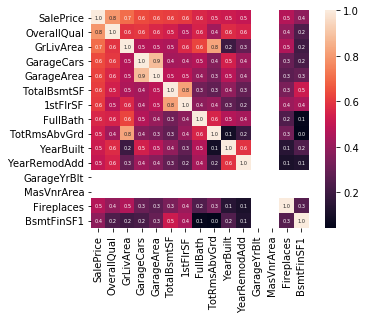

In [8]:
#correlation matrix
#largest columns of the correlation matrix
#most important corelated columns
corrmat = num_data.corr()
k = 15 #number of variables for heatmap
# largest columns of the sales price correlation matrix
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(num_data[cols].values.T) # correlation matric of the data table after taking transpose of the data table
#sns.set(font_scale=1.25)
hmap = sns.heatmap(cm, cbar=True, annot=True ,square=True, fmt='.1f', annot_kws={'size': 5}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

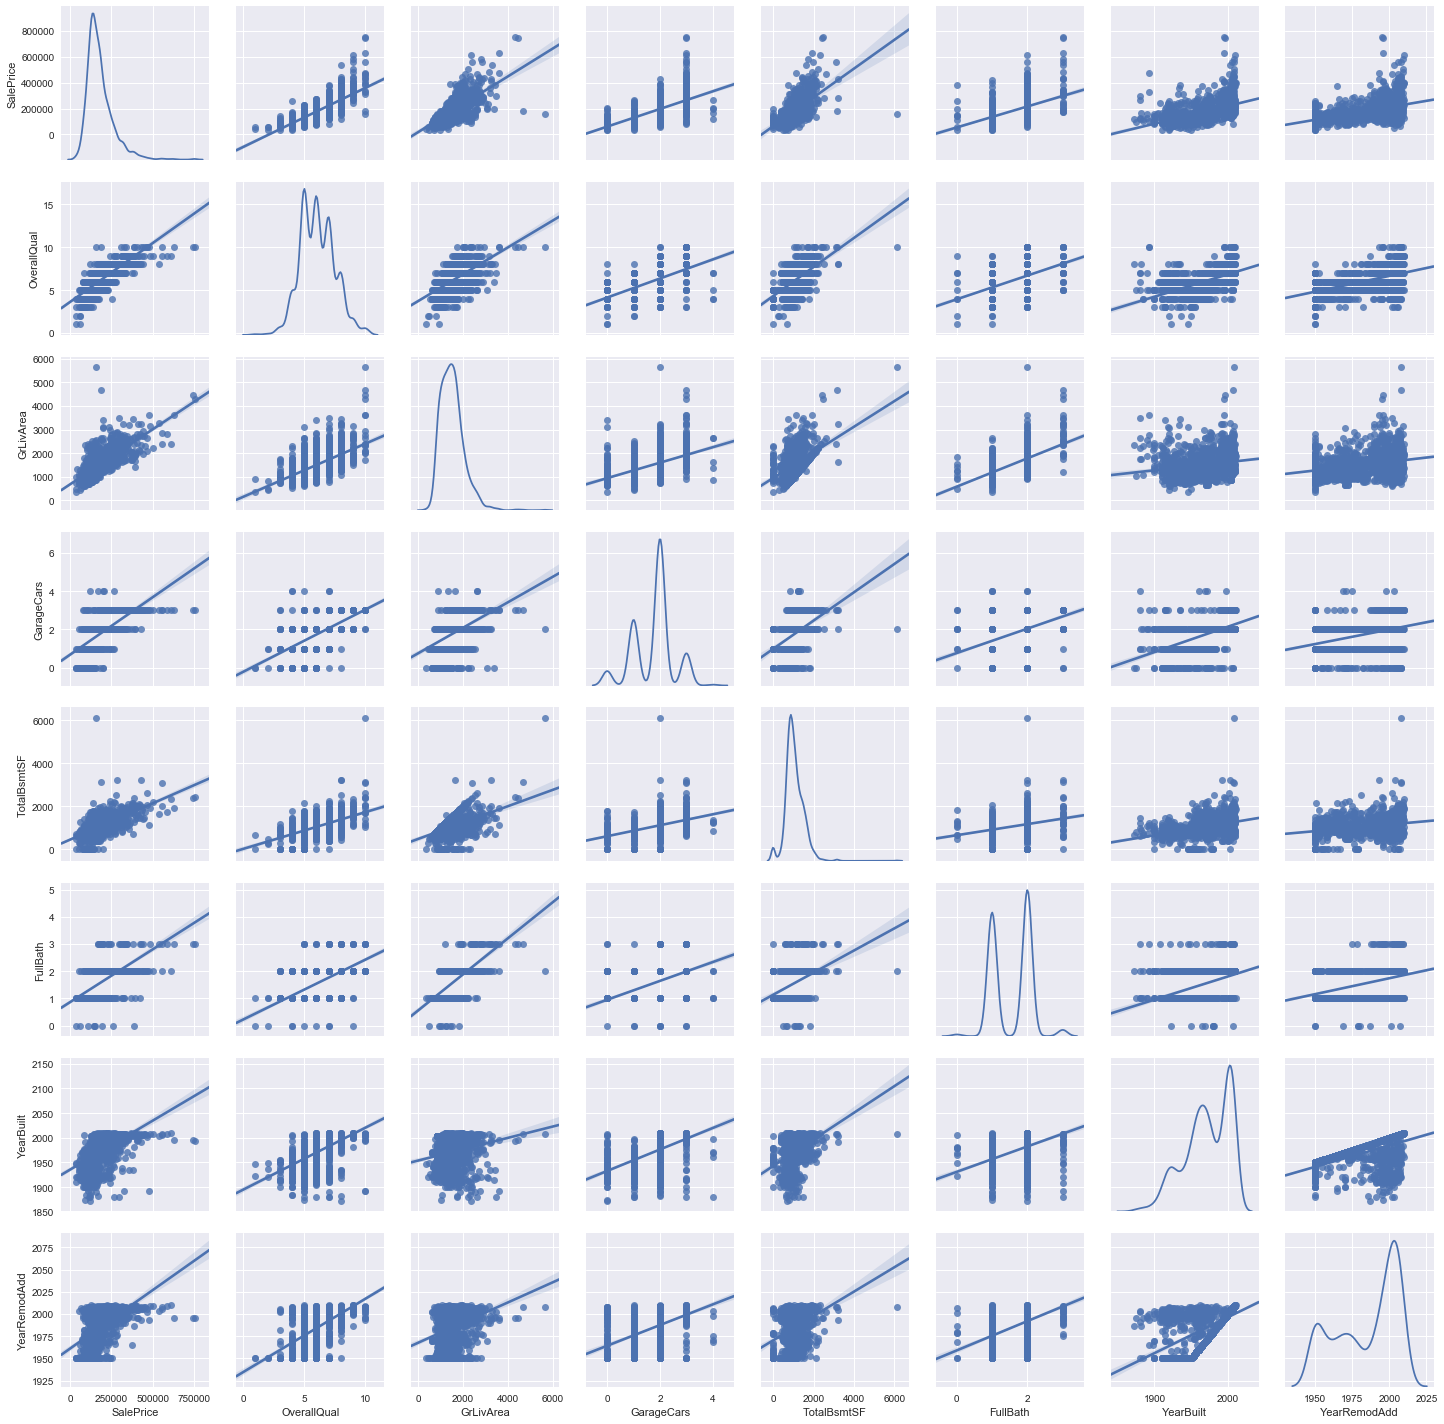

In [9]:
#scatterplots of top efeective varibles
sns.set()
colms = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt','YearRemodAdd']
#sns.pairplot(num_data[colms], size = 2.5, hue="OverallQual", palette="husl", kind="reg", diag_kind="kde")
sns.pairplot(num_data[colms], size = 2.5, palette="Set3", kind="reg", diag_kind="kde")
plt.show();

# Following plots indicate me that there is Skewness in Salesprice, GrLiveArea,TotalBsmtSF, YearBuilt.
# we can normalised using log transform on above columns

# Cleaning the data

In [47]:
# check numerical columns missing data
num_data.isnull().sum().sort_values(ascending=False).head(5)

# check categorical columns mising values
cat_data.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
GarageCond        81
GarageQual        81
GarageFinish      81
GarageType        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtQual          37
BsmtCond          37
MasVnrType         8
Electrical         1
Condition2         0
Condition1         0
Neighborhood       0
LandSlope          0
dtype: int64

In [11]:
# imputing missing values as a average of the columns
# numerical columns only 
# num_data=num_data.fillna(num_data.mean())
# num_data.head(5)

#or

#following is other suggestion from Kaggle kernel
num_data['LotFrontage']=dataset.groupby(['Neighborhood'])["LotFrontage"].transform(lambda x: x.fillna(x.median()))
num_data["MasVnrArea"] = dataset['MasVnrArea'].fillna(0)
num_data["GarageYrBlt"] = dataset['GarageYrBlt'].fillna(0)
# you might need to GarageYrBlt column
num_data.isnull().sum().sort_values(ascending=False)

SalePrice        0
BsmtFinSF1       0
GrLivArea        0
LowQualFinSF     0
2ndFlrSF         0
1stFlrSF         0
TotalBsmtSF      0
BsmtUnfSF        0
BsmtFinSF2       0
MasVnrArea       0
YrSold           0
YearRemodAdd     0
YearBuilt        0
OverallCond      0
OverallQual      0
LotArea          0
LotFrontage      0
MSSubClass       0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
MoSold           0
MiscVal          0
PoolArea         0
ScreenPorch      0
3SsnPorch        0
EnclosedPorch    0
OpenPorchSF      0
WoodDeckSF       0
GarageArea       0
GarageCars       0
GarageYrBlt      0
Fireplaces       0
TotRmsAbvGrd     0
KitchenAbvGr     0
BedroomAbvGr     0
Id               0
dtype: int64

## function for data cleaning 

# Regression models

In [16]:
# importing library for differents models
from sklearn.linear_model import LinearRegression, Lasso,Ridge, LassoLarsIC, LassoCV, ElasticNet,BayesianRidge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone

from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

import sklearn.model_selection as MS
import xgboost as xgb
#import lightgbm as lgb

In [320]:
# further split train and test data
# separating our train dataset into further train and test for cross valudation
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size = 0.2 , random_state = 0)


In [341]:
# function to calculate root mean square error with crossvalidation
# input is the specifi model and output is the rmse and r^2 values

n_folds = 10
def rmse_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=10).get_n_splits(X_train.values)
    rmse= np.sqrt(-cross_val_score(model, X_train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

# function to calculate R^2 
def rsquare_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=10).get_n_splits(X_train.values)
    rmse= np.sqrt(cross_val_score(model, X_train.values, y_train, cv = kf))
    return(rmse)

import re
def predictors_df(fitted_model,column_names=X1.columns): #returns a Pandas DataFrame holding predictors and coefficients
    results=pd.DataFrame(np.append(column_names,fitted_model.coef_).reshape(2,len(fitted_model.coef_))).transpose()
    results.columns = ['Predictor','Coefficient']
    results=results.loc[abs(results['Coefficient']) > 0]
    results = results.sort_values(by='Coefficient',ascending=False)
    results.name = re.search(r'\w*',repr(fitted_model)).group(0)
    return results




In [19]:
#Ols model
ols = LinearRegression()
score=rmse_cv(ols) # score with cross validation
rsquare=rsquare_cv(ols)
#print('ols score(rmse) : {:0.5f} ({:0.5f})'.format(score.mean(),score.std()))
#print('ols R^2 : {:0.5f} ({:0.5f})'.format(rsquare.mean(),rsquare.std()))

ols.fit(X_train,y_train)

#TODO: on the best model, test normality of errors, independence of errors etc
#TODO: other various tests (leverage, outliers?)

## fit your linear model with fit() function
#ols.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
#for i in range(len(X1.columns)):
    #print (X1.columns[i] + ': ' + str(ols.coef_[i]))
    
ols_betas = predictors_df(ols)

In [21]:
# lasso regression ( more consise way)
# ElasNet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.05, l1_ratio=0.5, random_state=1))

lasso = Lasso(alpha =0.5, random_state=1)
#score=rmse_cv(lasso) # score with cross validation
rsquare=rsquare_cv(lasso)
print('lasso score : {:0.5f} ({:0.5f})'.format(score.mean(),score.std()))
print('lasso R^2 : {:0.5f} ({:0.5f})'.format(rsquare.mean(),rsquare.std()))

lasso score : 0.13740 (0.01480)
lasso R^2 : 0.90635 (0.01992)


*TODO: CY: pass a grid of parameters to tune during cross-validation*<br>
See <a href="#tuning">below</a>. If we want to tune other parameters, we can turn the tuning_parameters into a list and add parameters.

*TODO: CY:  have lasso spit out predictors it keeps for various alpha*<br>
Done, in the form of a Pandas DF. See <a href="#predictors">below</a>.

<p><a name="tuning"></a></p>

In [419]:
tuning_parameters = "{'alpha': [.0001 * i for i in range(100)]}"
lasso_tuning = MS.GridSearchCV(estimator =Lasso(), 
                param_grid = eval(tuning_parameters),
                scoring ="neg_mean_squared_error")
lasso_tuning.fit(X_train, y_train)

print("Range of parameters tested:")
print(tuning_parameters)
print("Best parameters set found on development set:")
print()
print(lasso_tuning.best_params_)
print()
print("Grid scores on development set: See next cell")
print()

#results = MS.cross_validate(estimator = lasso, X =X1, y =Y1, scoring ="neg_mean_squared_error", cv = n_folds)

Range of parameters tested:
{'alpha': [.0001 * i for i in range(100)]}
Best parameters set found on development set:

{'alpha': 0.0006000000000000001}

Grid scores on development set: See next cell



In [414]:
print("Range of parameters tested:")
print(tuning_parameters)
print("Best parameters set found on development set:")
print()
print(lasso_tuning.best_params_)
print()
print("Grid scores on development set: See next cell")
print()

Range of parameters tested:
{'alpha': [.0001 * i for i in range(100)]}
Best parameters set found on development set:

{'alpha': 0.0001}

Grid scores on development set: See next cell



1171    12.001512
75      11.418626
390     11.686887
1283    11.842236
683     12.560248
642     12.751303
247     11.849405
1449    11.429555
896     11.575910
1115    12.669810
186     12.061053
156     11.603689
322     12.614869
8       11.774528
1355    12.043560
1333    11.740069
471     12.154785
1057    12.421188
1019    12.271350
1390    12.367345
915     11.225257
847     11.801864
570     11.867806
1401    12.170451
1030    11.982935
643     11.931642
620     11.112463
621     12.388398
598     12.289959
432     11.715874
          ...    
1435    12.066816
1202    11.669938
99      11.767188
851     12.278398
448     11.691080
756     12.264346
977     12.205578
115     12.078245
778     11.877576
72      12.128117
846     12.269052
538     11.970357
850     11.786770
174     12.122696
87      12.010672
552     12.450982
706     12.618186
314     12.089544
1422    11.824087
601     11.856522
1095    12.080696
600     12.524530
277     11.856522
1034    11.693170
1385    11

<a name="predictors"></a>

In [427]:
lasso = Lasso(alpha=.0005,random_state=1)
lasso.fit(X_train,y_train)
lasso_betas = predictors_df(lasso)
lasso_betas
#lasso.score(X_test,y_test)
#lasso.alpha

,Predictor,Coefficient
137,OverallQual_9,0.125432
80,Neighborhood_Crawfor,0.109593
138,OverallQual_10,0.107484
268,Functional_Typ,0.0843246
96,Neighborhood_StoneBr,0.0824685
136,OverallQual_8,0.0742035
147,OverallCond_9,0.073722
258,KitchenQual_Ex,0.0689218
164,Exterior1st_BrkFace,0.044994
145,OverallCond_7,0.0431029


In [432]:
lcv = LassoCV(random_state=1)
lcv.fit(X_train,y_train)
lasso.fit(X_train,y_train)
lcv_betas = predictors_df(lcv)
lasso_betas = predictors_df(lasso)
lcv_betas.merge(lasso_betas, on = 'Predictor',suffixes=(lcv_betas.name,lasso_betas.name),how="outer")
#pd.concat([ols_betas,lasso_betas],axis=1)
#lasso_betas
#ols_betas
#lcv_betas
#lcv.alpha_
lcv.score(X_test,y_test)

0.8515281540218509

In [189]:
#ridge regression
ridg=Ridge(alpha =5, random_state=1)
ridg.fit(X_train,y_train)
score=rmse_cv(ridg) # score with cross validation
rsquare=rsquare_cv(ridg)
print('Ridge score : {:0.5f} ({:0.5f})'.format(score.mean(),score.std()))
print('Ridge R^2 : {:0.5f} ({:0.5f})'.format(rsquare.mean(),rsquare.std()))
predictors_df(ridg)

#TODO: CY: pass a grid of parameters to tune during cross-validation
#TODO: CY: have lasso spit out predictors it keeps for various alpha



Ridge score : 0.11945 (0.01511)
Ridge R^2 : 0.95241 (0.00949)


,Predictor,Coefficient
96,Neighborhood_StoneBr,0.0956289
138,OverallQual_9,0.0950609
147,OverallCond_9,0.0921534
80,Neighborhood_Crawfor,0.0854002
130,OverallQual_10,0.0844298
268,Functional_Typ,0.0783688
47,MSZoning_FV,0.0773208
146,OverallCond_8,0.0639561
258,KitchenQual_Ex,0.0586183
164,Exterior1st_BrkFace,0.0585422


In [28]:
pd.get_dummies(clean_final).columns

Index(['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=349)

In [29]:
#elastic net regression
ENet=ElasticNet(alpha=0.5, random_state=1)
#ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
score=rmse_cv(ENet) # score with cross validation
rsquare=rsquare_cv(ENet)
print('Elastic Net score : {:0.5f} ({:0.5f})'.format(score.mean(),score.std()))
print('Elastic Net R^2 : {:0.5f} ({:0.5f})'.format(rsquare.mean(),rsquare.std()))

# TODO: CY: do we need this mixture of Lasso and Ridge ? We may decide not to do it, because we have one more param to fit. 


Elastic Net score : 0.16318 (0.01841)
Elastic Net R^2 : 0.90863 (0.01907)


In [30]:
Rand_For=RandomForestRegressor()
score=rmse_cv(Rand_For) # score with cross validation
rsquare=rsquare_cv(Rand_For)
print('Random Forest score : {:0.5f} ({:0.5f})'.format(score.mean(),score.std()))
print('Random Forest R^2 : {:0.5f} ({:0.5f})'.format(rsquare.mean(),rsquare.std()))

#TODO: Marius + Akshay: Random Forest
#TODO: Marius + Akshay: Bagging
#TODO: Marius + Akshay: Boost

Random Forest score : 0.15278 (0.01872)
Random Forest R^2 : 0.91698 (0.01776)


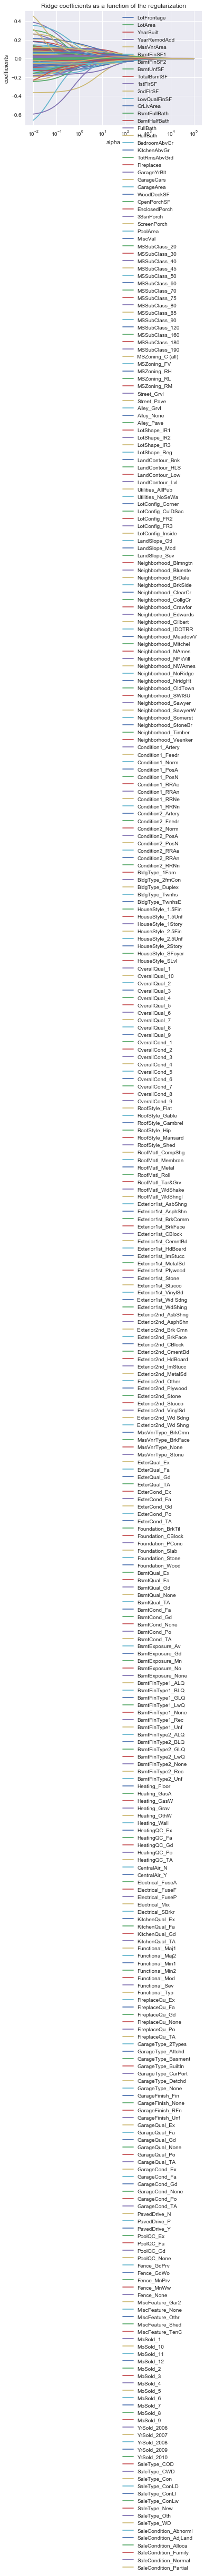

In [31]:
# ridge plots

from sklearn import datasets
iris = datasets.load_iris()
# use the first three variables to predict the fourth variable
iris.x = iris.data[:, :3]
iris.y = iris.data[:, 3]

from sklearn import linear_model
ridge = linear_model.Ridge()

alpha_100 = np.logspace(-2, 5, 100)
coef = []
for i in alpha_100:
    ridge.set_params(alpha = i)
    ridge.fit(X1, Y1)
    coef.append(ridge.coef_)

columns = X1.columns
df_coef = pd.DataFrame(coef, index=alpha_100, columns=columns)
title = 'Ridge coefficients as a function of the regularization'
df_coef.plot(logx=True, title=title)
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.show()

In [32]:
df_coef

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0.010000,0.000387,0.000003,0.001868,0.000873,0.000012,0.000059,0.000043,-3.608814e-07,0.000102,0.000079,...,-1.062827e-02,0.027287,0.026586,-0.053129,-0.042407,6.626005e-02,-0.003754,-0.020147,0.018926,-0.018878
0.011768,0.000387,0.000003,0.001868,0.000872,0.000012,0.000059,0.000043,-4.157972e-07,0.000102,0.000079,...,-1.062720e-02,0.027585,0.026802,-0.053262,-0.042437,6.622539e-02,-0.003288,-0.020173,0.018950,-0.019277
0.013849,0.000387,0.000003,0.001868,0.000870,0.000012,0.000059,0.000043,-4.760435e-07,0.000102,0.000079,...,-1.062658e-02,0.027920,0.027042,-0.053410,-0.042472,6.619597e-02,-0.002779,-0.020202,0.018978,-0.019721
0.016298,0.000387,0.000003,0.001868,0.000868,0.000012,0.000059,0.000043,-5.423164e-07,0.000102,0.000079,...,-1.062649e-02,0.028293,0.027305,-0.053573,-0.042510,6.617459e-02,-0.002227,-0.020235,0.019011,-0.020213
0.019179,0.000387,0.000003,0.001868,0.000866,0.000012,0.000059,0.000043,-6.139297e-07,0.000102,0.000079,...,-1.062695e-02,0.028706,0.027592,-0.053752,-0.042554,6.616444e-02,-0.001634,-0.020272,0.019050,-0.020755
0.022570,0.000388,0.000003,0.001868,0.000864,0.000012,0.000059,0.000043,-6.911771e-07,0.000101,0.000079,...,-1.062790e-02,0.029162,0.027901,-0.053947,-0.042603,6.616903e-02,-0.001004,-0.020312,0.019095,-0.021345
0.026561,0.000388,0.000003,0.001868,0.000862,0.000012,0.000059,0.000043,-7.732869e-07,0.000101,0.000079,...,-1.062915e-02,0.029660,0.028230,-0.054158,-0.042658,6.619204e-02,-0.000339,-0.020356,0.019147,-0.021986
0.031257,0.000388,0.000003,0.001867,0.000860,0.000012,0.000059,0.000043,-8.605504e-07,0.000101,0.000079,...,-1.063031e-02,0.030201,0.028577,-0.054385,-0.042721,6.623700e-02,0.000355,-0.020404,0.019208,-0.022675
0.036784,0.000389,0.000003,0.001867,0.000857,0.000012,0.000059,0.000043,-9.522777e-07,0.000101,0.000079,...,-1.063075e-02,0.030784,0.028937,-0.054626,-0.042792,6.630707e-02,0.001073,-0.020456,0.019278,-0.023410
0.043288,0.000390,0.000003,0.001867,0.000855,0.000012,0.000058,0.000043,-1.047521e-06,0.000100,0.000080,...,-1.062951e-02,0.031408,0.029307,-0.054881,-0.042872,6.640463e-02,0.001809,-0.020512,0.019358,-0.024188


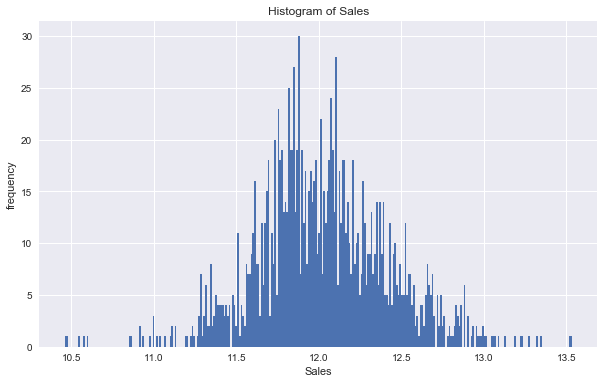

In [33]:
fig = plt.figure(figsize=(10,6))
plt.ylabel('frequency')
plt.xlabel('Sales',)
plt.title('Histogram of Sales')
Y1.hist(bins=300)
plt.show()

In [34]:
fig = plt.figure(figsize=(15, 9))
#sns.boxplot(y=Y1, x=X['OverallQual'])
sns.boxplot(y=Y1, x=X['GrLivArea'])


plt.show()

NameError: name 'X' is not defined

In [ ]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [ ]:
models = [LinearRegression(),Ridge(),Lasso(alpha=0.01,max_iter=10000),RandomForestRegressor(),GradientBoostingRegressor(),SVR(),LinearSVR(),
          ElasticNet(alpha=0.001,max_iter=10000),SGDRegressor(max_iter=1000,tol=1e-3),BayesianRidge(),KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5),
          ExtraTreesRegressor(),XGBRegressor()]

names = ["LR", "Ridge", "Lasso", "RF", "GBR", "SVR", "LinSVR", "Ela","SGD","Bay","Ker","Extra","Xgb"]
for name, model in zip(names, models):
    score = rmse_cv(model, X_scaled, y_log)
    print("{}: {:.6f}, {:.4f}".format(name,score.mean(),score.std()))

# Model building

In [ ]:
# dividing feature and target variables from numerical data only
X = num_data.iloc[:, :-1] # features
y = num_data.iloc[:, -1] # targets
X.head(5)

In [ ]:
# looking target variables ( sales price)
X1=X
y.describe()
sns.distplot(y)

# building simple regression model

In [301]:
# Splitting the dataset into the Training set and Test set

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size = 0.2 , random_state = 0)

# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)


NameError: name 'y' is not defined

In [ ]:

# measure R^2,RSS score
regressor.score(X_train,y_train)
print('R^2', regressor.score(X_test,y_test))
print("RSS: %.2f" % np.sum((y_test - regressor.predict(X_test))**2))
print(sum(abs(y_test - regressor.predict(X_test)))/292)
print(sqrt(np.sum(y_test - regressor.predict(X_test))**2)/292)



In [ ]:
#### multiple linear regression fit with ols

from math import sqrt
from sklearn import linear_model
ols = linear_model.LinearRegression()

ols.fit(X_train,y_train)

print("R^2: %.5f" % ols.score(X_train, y_train))
print("RSS: %.2f" % np.sum((ols.predict(X_train) - y_train) ** 2))
print(sqrt(np.sum((ols.predict(X_train) - y_train) ** 2))/292)


In [ ]:
# visualization of prediction
plt.scatter(y_train,ols.predict(X_train), c=['r','b'])

In [ ]:
# Building the optimal model using Backward Elimination
# insert identity column in train data frame 
import statsmodels.formula.api as sm
X2 = np.append(arr = np.ones((1460, 1)).astype(int), values = X1, axis = 1)
#X_opt = X2[:, [0, 1, 2, 3, 4, 5]]
X_opt = X2[:, list(range(0,X1.shape[1]))]
X_opt

In [ ]:
# regression model

regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()


In [ ]:

regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

X_opt = X2[:, [0, 1, 3, 4, 5]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
print(regressor_OLS.summary())
X_opt = X2[:, [0, 3, 4, 5]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
print(regressor_OLS.summary())
X_opt = X2[:, [0, 3, 5]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
print(regressor_OLS.summary())
X_opt = X2[:, [0, 3]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
print(regressor_OLS.summary())


In [ ]:
# Backward elimination method using loop
# Backward elimination with p-values

import statsmodels.formula.api as sm
def backwardElimination(x, sl):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
    regressor_OLS.summary()
    return x
 
SL = 0.05

X_opt = X2[:, list(range(0,X1.shape[1]))]

X_Modeled = backwardElimination(X_opt, SL)



In [ ]:
#Backward elimination with p-values and adjusted R squared

import statsmodels.formula.api as sm
def backwardElimination(x, SL):
    numVars = len(x[0])
    temp = np.zeros((1460,37)).astype(int)
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues)
        adjR_before = regressor_OLS.rsquared_adj
        if maxVar > SL:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j] == maxVar):
                    temp[:,j] = x[:, j]
                    x = np.delete(x, j, 1)
                    tmp_regressor = sm.OLS(y, x).fit()
                    adjR_after = tmp_regressor.rsquared_adj
                    if (adjR_before >= adjR_after):
                        x_rollback = np.hstack((x, temp[:,[0,j]]))
                        x_rollback = np.delete(x_rollback, j, 1)
                        print (regressor_OLS.summary())
                        return x_rollback
                    else:
                        continue
    regressor_OLS.summary()
    return x
 
SL = 0.0005
X_opt = X2[:, list(range(0,X1.shape[1]))]

X_Modeled = backwardElimination(X_opt, SL)



In [ ]:
from  statsmodels.genmod import generalized_linear_model
glm = generalized_linear_model.GLM(y, X2)
# family = sm.families.Binomial() for logistic regression

In [ ]:
result = glm.fit()
result.summary()


In [ ]:
y_train.values.size
y_pred.size
y_test.size

In [ ]:
# calculate these metrics by hand!
from sklearn import metrics
y_train.values
print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

In [ ]:
sns.distplot((y_test-y_pred),bins=50);

In [ ]:
# visualization of prediction
plt.scatter(y_test,y_pred, c=['r','b'])

# SVR regression

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_scale = sc_X.fit_transform(X1)
y_scale = sc_y.fit_transform([y])

X_scale
y_scale
X1

In [ ]:
# Fitting SVR to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X1, y)


In [ ]:

# Predicting a new result
y_pred = regressor.predict(6.5)
y_pred = sc_y.inverse_transform(y_pred)


# Visualising the SVR results
plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

# Visualising the SVR results (for higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.01) # choice of 0.01 instead of 0.1 step because the data is feature scaled
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'g')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [ ]:
# Visualising the SVR results (for higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.01) # choice of 0.01 instead of 0.1 step because the data is feature scaled
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'g')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.sh